# Data science pipeline: pandas, seaborn, scikit-learn
*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Agenda

- How do I use the **pandas library** to read data into Python?
- How do I use the **seaborn library** to visualize data?
- What is **linear regression**, and how does it work?
- How do I **train and interpret** a linear regression model in scikit-learn?
- What are some **evaluation metrics** for regression problems?
- How do I choose **which features to include** in my model?

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

## Reading data using pandas

**Pandas:** popular Python library for data exploration, manipulation, and analysis

- Anaconda users: pandas is already installed
- Other users: [installation instructions](http://pandas.pydata.org/pandas-docs/stable/install.html)

In [3]:
# conventional way to import pandas
# import pandas as pd

import pandas as pd


In [4]:
# # read CSV file directly from a URL and save the results
# data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# # display the first 5 rows
# data.head()

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [5]:
# display the last 5 rows
# data.tail()

data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
# check the shape of the DataFrame (rows, columns)
# data.shape

data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: run **`conda install seaborn`** from the command line
- Other users: [installation instructions](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

In [7]:
# # conventional way to import seaborn
# import seaborn as sns

# # allow plots to appear within the notebook
# %matplotlib inline

import seaborn as sns

%matplotlib inline

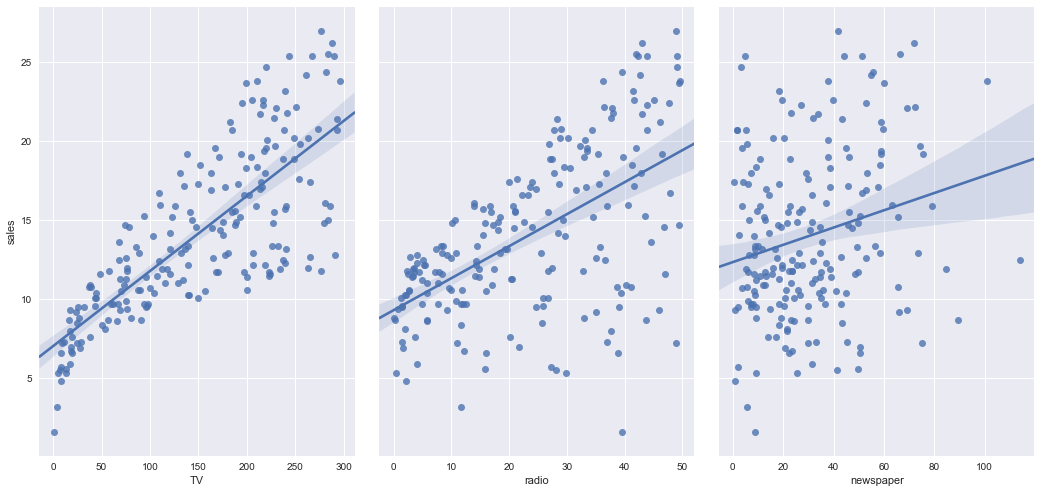

In [10]:
# # visualize the relationship between the features and the response using scatterplots
# sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect = 0.7, kind = 'reg')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [11]:
# # create a Python list of feature names
# feature_cols = ['TV', 'Radio', 'Newspaper']

# # use the list to select a subset of the original DataFrame
# X = data[feature_cols]

# # equivalent command to do this in one line
# X = data[['TV', 'Radio', 'Newspaper']]

# # print the first 5 rows
# X.head()

feature_cols = ['TV', 'radio', 'newspaper']

X = data[feature_cols]

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
# # check the type and shape of X
# print(type(X))
# print(X.shape)

print(type(X))

print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [13]:
# # select a Series from the DataFrame
# y = data['Sales']

# # equivalent command that works if there are no spaces in the column name
# y = data.Sales

# # print the first 5 values
# y.head()

y = data['sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [14]:
# # check the type and shape of y
# print(type(y))
# print(y.shape)

print(type(y))

print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [15]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [16]:
# # default split is 75% for training and 25% for testing
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Linear regression in scikit-learn

In [17]:
# # import model
# from sklearn.linear_model import LinearRegression

# # instantiate
# linreg = LinearRegression()

# # fit the model to the training data (learn the coefficients)
# linreg.fit(X_train, y_train)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [20]:
# # print the intercept and coefficients
# print(linreg.intercept_)
# print(linreg.coef_)

print(linreg.intercept_)

print(linreg.coef_)

print(type(linreg.coef_))

2.87696662232
[ 0.04656457  0.17915812  0.00345046]
<class 'numpy.ndarray'>


In [21]:
# # pair the feature names with the coefficients
# list(zip(feature_cols, linreg.coef_))

list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088839),
 ('newspaper', 0.0034504647111803779)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [22]:
# # make predictions on the testing set
# y_pred = linreg.predict(X_test)

y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [23]:
# # define true and predicted response values
# true = [100, 50, 30, 20]
# pred = [90, 50, 50, 30]

true = [100,50,30,20]

pred = [90,50,50,30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [24]:
# # calculate MAE by hand
# print((10 + 0 + 20 + 10)/4.)

# # calculate MAE using scikit-learn
# from sklearn import metrics
# print(metrics.mean_absolute_error(true, pred))

from sklearn import metrics

print(metrics.mean_absolute_error(true, pred))

10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [25]:
# # calculate MSE by hand
# print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# # calculate MSE using scikit-learn
# print(metrics.mean_squared_error(true, pred))

metrics.mean_squared_error(true,pred)

150.0

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [26]:
# # calculate RMSE by hand
# import numpy as np
# print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# # calculate RMSE using scikit-learn
# print(np.sqrt(metrics.mean_squared_error(true, pred)))

import numpy as np

print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [27]:
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.404651423032895

## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [32]:
# # create a Python list of feature names
# feature_cols = ['TV', 'Radio']

# # use the list to select a subset of the original DataFrame
# X = data[feature_cols]

# # select a Series from the DataFrame
# y = data.Sales

# # split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# # fit the model to the training data (learn the coefficients)
# linreg.fit(X_train, y_train)

# # make predictions on the testing set
# y_pred = linreg.predict(X_test)

# # compute the RMSE of our predictions
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


features_cols = ['TV', 'radio']

X = data[features_cols]

y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382886

The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## Resources

Linear regression:

- [Longer notebook on linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb) by me
- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
- [Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/) by me
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

Pandas:

- [Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation

Seaborn:

- [Official seaborn tutorial](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial.html)
- [Example gallery](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)

## Comments or Questions?

- Email: <kevin@dataschool.io>
- Website: http://dataschool.io
- Twitter: [@justmarkham](https://twitter.com/justmarkham)

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()